# <center>Assignment</center>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
from scipy.stats import boxcox
from scipy.stats import gaussian_kde
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("Diamonds.csv")     #importing the dataframe as df
df.head()

,carat,cut,color,clarity,depth,table,weight,size,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,335


In [3]:
df.shape         #Checking the shape of df

(53940, 9)

In [4]:
df.info()       #Checking the dtypes and Non null count of df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   weight   53940 non-null  float64
 7   size     53940 non-null  float64
 8   price    53940 non-null  int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 3.7+ MB


In [5]:
# Create 2 dataframes out of this dataframe – 1 with all numerical variables and other with all categorical variables.

In [6]:
num_cols = df.select_dtypes(include="number")
num_cols           #numerical variables dataframe

,carat,depth,table,weight,size,price
0,0.23,61.5,55.0,3.95,3.98,326
1,0.21,59.8,61.0,3.89,3.84,326
2,0.23,56.9,65.0,4.05,4.07,327
3,0.29,62.4,58.0,4.20,4.23,334
4,0.31,63.3,58.0,4.34,4.35,335
...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,2757
53936,0.72,63.1,55.0,5.69,5.75,2757
53937,0.70,62.8,60.0,5.66,5.68,2757
53938,0.86,61.0,58.0,6.15,6.12,2757


In [7]:
cat_cols = df.select_dtypes(include = "object")
cat_cols         #categorical variables dataframe

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


In [8]:
# Calculate the measure of central tendency of numerical variables using Pandas and statistics libraries and check if the calculated values are different between these 2 libraries

In [9]:
pandas_CT = pd.DataFrame({"Mean":num_cols.mean(), "Median": num_cols.median(), "Mode" : num_cols.mode().iloc[0]})
pandas_CT

,Mean,Median,Mode
carat,0.797940,0.70,0.30
depth,61.749405,61.80,62.00
table,57.457184,57.00,56.00
weight,5.731157,5.70,4.37
size,5.734526,5.71,4.34
price,3932.799722,2401.00,605.00


In [10]:
lst = []

for col in num_cols:
    lst.append({ "Column" : col, "Mean" :stats.mean(num_cols[col]), "Median" : stats.median(num_cols[col]), "Mode" : stats.mode(num_cols[col])})

stats_CT = pd.DataFrame(lst).set_index("Column")
stats_CT

,Mean,Median,Mode
Column,,,
carat,0.797940,0.70,0.30
depth,61.749405,61.80,62.00
table,57.457184,57.00,56.00
weight,5.731157,5.70,4.37
size,5.734526,5.71,4.34
price,3932.799722,2401.00,605.00


In [11]:
comparison = pandas_CT.join(stats_CT, lsuffix="_pandas", rsuffix="_stats")
comparison

,Mean_pandas,Median_pandas,Mode_pandas,Mean_stats,Median_stats,Mode_stats
carat,0.797940,0.70,0.30,0.797940,0.70,0.30
depth,61.749405,61.80,62.00,61.749405,61.80,62.00
table,57.457184,57.00,56.00,57.457184,57.00,56.00
weight,5.731157,5.70,4.37,5.731157,5.70,4.37
size,5.734526,5.71,4.34,5.734526,5.71,4.34
price,3932.799722,2401.00,605.00,3932.799722,2401.00,605.00


In [12]:
# Check the skewness of all numeric variables. Mention against each variable if its highly skewed/light skewed/ Moderately skwewed.

In [13]:
skewness = num_cols.skew()

def skew_tag(value):
    x=abs(value)
    if x<0.5:
        return "Lightly_Skewed"
    elif x<1:
        return "Moderately_Skewed"
    else:
        return "Highly_Skewed"

df_skewness = pd.DataFrame({"Skewness" : skewness, "Skewness_tag" : skewness.apply(skew_tag), "Need_Transformation" : skewness.apply(skew_tag)!="Lightly_Skewed"})
df_skewness

,Skewness,Skewness_tag,Need_Transformation
carat,1.116646,Highly_Skewed,True
depth,-0.082294,Lightly_Skewed,False
table,0.796896,Moderately_Skewed,True
weight,0.378676,Lightly_Skewed,False
size,2.434167,Highly_Skewed,True
price,1.618395,Highly_Skewed,True


In [14]:
# Use the different transformation techniques to convert skewed data found in previous question into normal distribution.

In [15]:
#computing the skewnesss
skewness = num_cols.skew()

#selecting highly or moderately skewed columns
skewed_cols = skewness[abs(skewness)>=0.5].index

result = []
df_transformed = num_cols.copy()

for col in skewed_cols:
    x = num_cols[col]

    trans_skew = {}
    trans_data = {}
    
    #Applying Transformation
    # Log transformation
    trans_data["log"] = np.log1p(x)
    trans_skew["log"] = trans_data["log"].skew()

    #square-root transformation
    trans_data["sqrt"] = np.sqrt(x)
    trans_skew["sqrt"] = trans_data["sqrt"].skew()

    #cube-root transformation
    trans_data["cbrt"] = np.cbrt(x)
    trans_skew["cbrt"] = trans_data["cbrt"].skew()

    #box-cox transformation
    if (x>0).all():
        trns, lam = boxcox(x)
        trans_data["boxcox"] = pd.Series(trns, index = x.index)
        trans_skew["boxcox"] = trans_data["boxcox"].skew()

    #Choosing Best transformation result
    best_transformation = min(trans_skew, key = lambda y: abs(trans_skew[y]))

    #Applying best transformation th the transformed dataframe
    df_transformed[col+"_trans"]=trans_data[best_transformation]

    result.append({
        "Column":col,
        "Original_Skewness":x.skew(),
        "Best_Transformation":best_transformation,
        "Transformed_skewness":trans_skew[best_transformation]
    })

#Summary
Skewness_Summary = pd.DataFrame(result)
Skewness_Summary

,Column,Original_Skewness,Best_Transformation,Transformed_skewness
0,carat,1.116646,boxcox,0.020450
1,table,0.796896,boxcox,0.000000
2,size,2.434167,log,0.006600
3,price,1.618395,boxcox,0.025578


In [16]:
# Create a user defined function in python to check the outliers using IQR method. Then pass all numeric variables in that function to check outliers

In [17]:
def outlier_detection_IQR(df,cols=None):

    """ This is a used defined function for checking the outliers.
        It return outlier_summary, outlier_rows.
        outlier_summary is a DataFrame and outlier_rows is a dict """
    
    if cols==None:
        cols = df.select_dtypes(include = "number").columns

    summary=[]
    outlier_rows={}

    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR

        outliers = df[(df[col]<lower_bound) | (df[col]>upper_bound)]

        summary.append({
            "Column":col,
            "Q1":Q1,
            "Q3":Q3,
            "IQR":IQR,
            "lower_bound":lower_bound,
            "upper_bound":upper_bound,
            "outlier_count":outliers.shape[0]
        })

        outlier_rows[col]=outliers

    outlier_summary = pd.DataFrame(summary)
    return outlier_summary, outlier_rows

summary, rows = outlier_detection_IQR(num_cols)
summary

,Column,Q1,Q3,IQR,lower_bound,upper_bound,outlier_count
0,carat,0.40,1.04,0.64,-0.560,2.000,1889
1,depth,61.00,62.50,1.50,58.750,64.750,2545
2,table,56.00,59.00,3.00,51.500,63.500,605
3,weight,4.71,6.54,1.83,1.965,9.285,32
4,size,4.72,6.54,1.82,1.990,9.270,29
5,price,950.00,5324.25,4374.25,-5611.375,11885.625,3540


In [18]:
# Convert categorical variables into numerical variables using LabelEncoder technique.

In [19]:
def label_encoder_categorical(df, cat_cols=None):
    """ This is a user defined function for label encoding of categorical variables.
        It returns two daframes first is df_encoded which contains only categorical variables ans second is df_final which contains all the variables after encoding in categorical"""
    df_encoded=pd.DataFrame(index=df.index)
    if cat_cols==None:
        cat_cols = df.select_dtypes(include=["object","category"]).columns

    le = LabelEncoder()
    for col in cat_cols:
        df_encoded[col]=le.fit_transform(df[col].astype(str))
    df_final = pd.concat([df.drop(columns=cat_cols), df_encoded], axis=1)
    return df_encoded, df_final

df_encoded, df_final = label_encoder_categorical(df)
df_encoded

,cut,color,clarity
0,2,1,3
1,3,1,2
2,1,1,4
3,3,5,5
4,1,6,3
...,...,...,...
53935,2,0,2
53936,1,0,2
53937,4,0,2
53938,3,4,3


In [20]:
# Use both the feature scaling techniques (standardscaler/min max scaler) on all the variables.

In [21]:
num_cols = df.select_dtypes(include="number").columns

# Standard Scaling
std_scaler = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[num_cols] = std_scaler.fit_transform(df[num_cols])

df_standard_scaled.head()

,carat,cut,color,clarity,depth,table,weight,size,price
0,-1.198168,Ideal,E,SI2,-0.174092,-1.099672,-1.587837,-1.536196,-0.904095
1,-1.240361,Premium,E,SI1,-1.360738,1.585529,-1.641325,-1.658774,-0.904095
2,-1.198168,Good,E,VS1,-3.385019,3.375663,-1.498691,-1.457395,-0.903844
3,-1.071587,Premium,I,VS2,0.454133,0.242928,-1.364971,-1.317305,-0.902090
4,-1.029394,Good,J,SI2,1.082358,0.242928,-1.240167,-1.212238,-0.901839


In [22]:
num_cols = df.select_dtypes(include="number").columns
# Min-Max Scaling
mm_scaler = MinMaxScaler(feature_range=(0, 1))
df_minmax_scaled = df.copy()
df_minmax_scaled[num_cols] = mm_scaler.fit_transform(df[num_cols])

df_minmax_scaled.head()

,carat,cut,color,clarity,depth,table,weight,size,price
0,0.006237,Ideal,E,SI2,0.513889,0.230769,0.367784,0.067572,0.000000
1,0.002079,Premium,E,SI1,0.466667,0.346154,0.362197,0.065195,0.000000
2,0.006237,Good,E,VS1,0.386111,0.423077,0.377095,0.069100,0.000054
3,0.018711,Premium,I,VS2,0.538889,0.288462,0.391061,0.071817,0.000433
4,0.022869,Good,J,SI2,0.563889,0.288462,0.404097,0.073854,0.000487


In [23]:
# Create the Histogram for all numeric variables and draw the KDE plot on that.

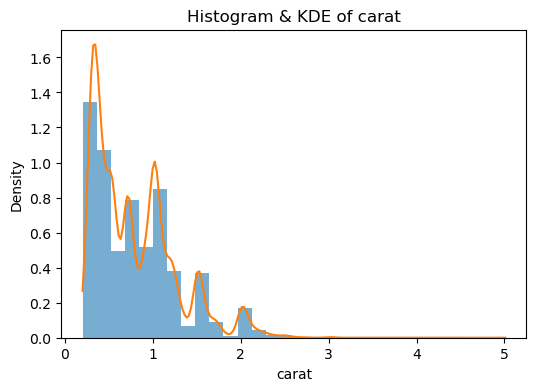

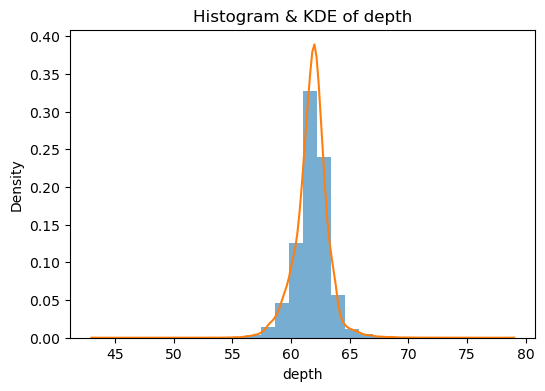

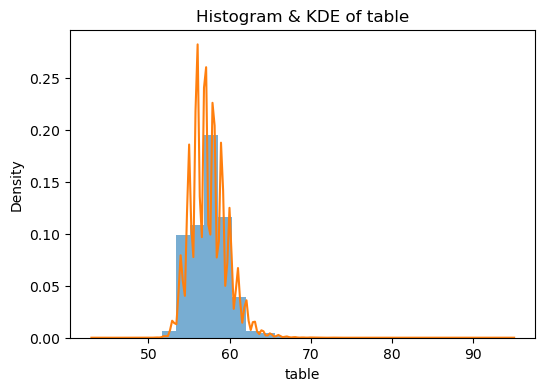

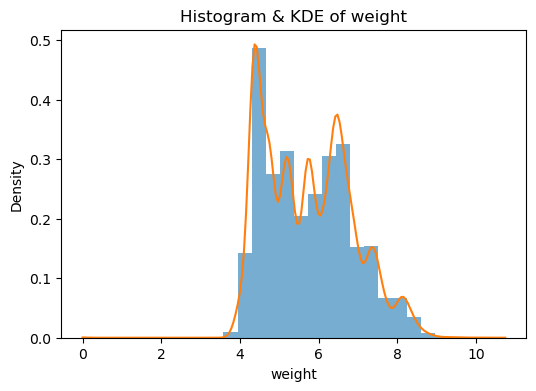

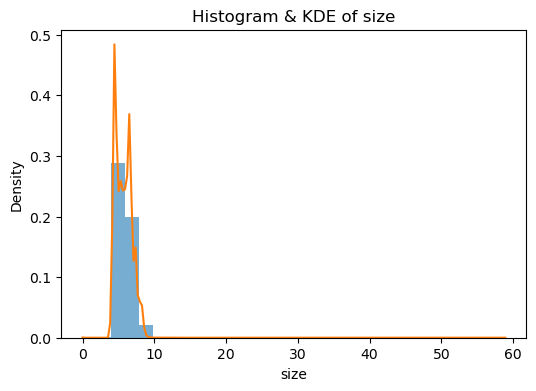

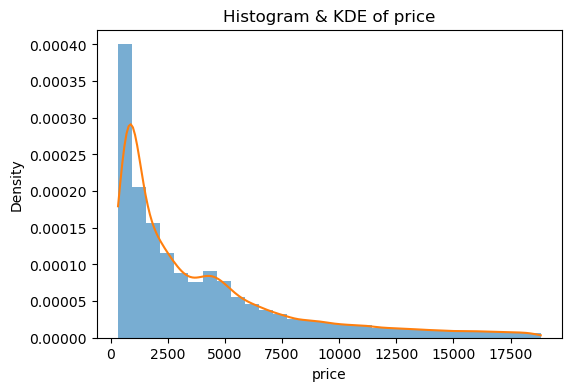

In [30]:

num_cols = df.select_dtypes(include="number").columns

for col in num_cols:
    data = df[col].dropna()
    
    plt.figure(figsize=(6,4))
    plt.hist(data, bins=30, density=True, alpha=0.6)
    
    kde = gaussian_kde(data)
    x_vals = np.linspace(data.min(), data.max(), 200)
    plt.plot(x_vals, kde(x_vals))
    
    plt.title(f'Histogram & KDE of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()


In [31]:
# Check the correlation between all the numeric variables using HeatMap and try to draw some conclusion about the data

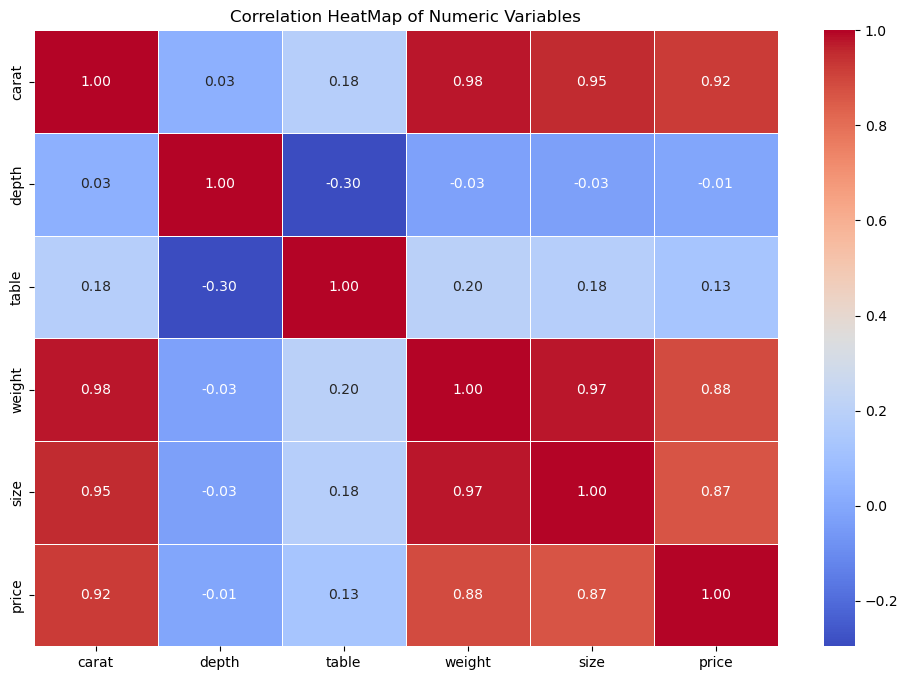

In [34]:
num_cols = df.select_dtypes(include="number")

corr_matrix = num_cols.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation HeatMap of Numeric Variables")
plt.show()


Interpretation of Correlation Heatmap

1.The heatmap shows a very strong positive correlation between carat, weight, and size. This indicates that these variables increase together, which is expected as larger diamonds tend to have higher weight and size.

2.Price is strongly positively correlated with carat, followed by weight and size. This suggests that carat is the most influential numeric variable affecting diamond price.

3.Depth shows almost no correlation with price and other size-related variables, indicating that depth alone does not have a significant linear impact on price.

4.Table has a weak positive correlation with price and other variables, implying that its contribution to price variation is limited compared to carat-related features.

5.The presence of high correlation among carat, weight, and size indicates multicollinearity, which may affect linear regression models. Feature selection or dimensionality reduction techniques may be required.

Overall, the heatmap helps identify important predictors, redundant features, and potential multicollinearity issues before model building.

In [35]:
# Explain Gradient descent in detail. How changing the values of learning rate can impact the convergence in Gradient Descent.

Gradient Descent (GD) is an optimization algorithm used to minimize a function.

In Machine Learning, the function we want to minimize is usually the loss function / cost function, for example:

- Mean Squared Error (MSE) in Linear Regression

- Cross Entropy Loss in Logistic Regression / Neural Networks

In calculus:

- Gradient = vector of partial derivatives

- It tells the direction of steepest increase

So if we want to minimize the function, we go in the opposite direction of the gradient.

Suppose we want to minimize a function:
        
J(θ)

where θ is parameters (weights).

The update rule is:

θ:=θ−α⋅∇J(θ)

Where:

- θ = model parameters

- α = learning rate

- ∇J(θ) = gradient of loss wrt parameters

Meaning:

- subtract gradient → move downhill

- learning rate controls step size

Changing the learning rate (α) directly controls the step size Gradient Descent takes while moving toward the minimum of the loss function. Because of that, it has a huge impact on convergence (speed + stability).

| Learning Rate | Effect                           | Convergence       |
| ------------- | -------------------------------- | ----------------- |
| Too small     | slow progress                    | yes but very slow |
| Too large     | overshoot/oscillation/divergence | no / unstable     |
| Optimal       | stable and fast                  | yes               |
